Final Project : Flight Fare Dataset
-----------------------------------

In this project we will perform the following actions 

1. Give Brief Description about the dataset and its attributes.
2. Data Exploration Plan
3. Data Cleaning
4. Featuer Engineering
5. KeyFindings and Insights through EDA
6. Hypothesis Formulation
7. Significance Test
8. Going forward plan in analyzing the data
9. Summary about the dataset quality

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing csv dataset into Pandas Dataframe
df = pd.read_excel('Data_Train.xlsx')   
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Dataset Summary
----------------

1. Airline : Column has different airline carrier in India operationg at Metropolitan cities
2. Date_of_Journey : Travelling date
3. Source : City in which you board the flight
4. Destination : City you want to reach
5. Route : Flight travel route
6. Dep_Time : Take-off time at source 
7. Arrival_Time : Landing time at destination
8. Duration : Travel time including the layover
9. Total_Stops : Layover stops
10. Additional_Info : Additional info regarding the travel
11. Price : Travel fare

Data Cleaning
-------------

In [4]:
# Looking for null values in the dataframe
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since null values entries are very less, we are removing them as it wont affect the outcome of the model due to data loss.

In [5]:
# removing the null value rows
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Taking a look at the features and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


We have to convert the date column to timestamp format and make a seperate column.

In [8]:
# Rretriving the date, month, time, seconds seperatly after converting them to time format.
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
# Deleting the Date of Journey column
df.drop(columns = ['Date_of_Journey'], inplace = True)

In [11]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Similarly perform the same for the Arrival and Departure columns and delete the original.

In [12]:
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_mins'] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop(columns = ['Dep_Time'], inplace = True)

In [13]:
df['Arr_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arr_mins'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(columns = ['Arrival_Time'], inplace = True)

Now we will write a function to seperate the hours, minutes from unformated values in the dataframe.
We are spliting the values and retrieveing the required information

In [14]:
duration = list(df.Duration)
# Assigning the missing hour and minutes notation for all the entries.
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

Duration_hours = []
Duration_mins = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split('h')[0]))
    Duration_mins.append(int(duration[i].split('m')[0].split()[-1]))


In [15]:
#Creating new columns for Hours and minutes in travel time
df['Duration_hours'] = Duration_hours
df['Duration_mins'] = Duration_mins

In [16]:
# Dropping the old columns
df.drop(columns = ['Duration'], inplace = True)

In [17]:
# Dropping the unnecesary columns 
df.drop(columns = ['Additional_Info','Route'], inplace = True)

In [18]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


Visual Insights and Exploration
-------------------------------

In [19]:
df.groupby(['Airline','Source']).count()

Destination  Total_Stops  Price  \
Airline                           Source                                      
Air Asia                          Banglore           89           89     89   
                                  Delhi              80           80     80   
                                  Kolkata           150          150    150   
Air India                         Banglore          332          332    332   
                                  Chennai            25           25     25   
                                  Delhi             746          746    746   
                                  Kolkata           512          512    512   
                                  Mumbai            136          136    136   
GoAir                             Banglore           93           93     93   
                                  Delhi              76           76     76   
                                  Kolkata            25           25     25   
IndiGo                            Banglore          523          523    523   
                                  Chennai           184          184    184   
                                  Delhi             705          705    705   
                                  Kolkata           445          445    445   
                                  Mumbai            196          196    196   
Jet Airways                       Banglore          788          788    788   
                                  Delhi            1586         1586   1586   
                                  Kolkata          1256         1256   1256   
                                  Mumbai            219          219    219   
Jet Airways Business              Banglore            4            4      4   
                                  Delhi               2            2      2   
Multiple carriers                 Delhi            1196         1196   1196   
Multiple carriers Premium economy Delhi              13           13     13   
SpiceJet                          Banglore          181          181    181   
                                  Chennai           128          128    128   
                                  Delhi              87           87     87   
                                  Kolkata           300          300    300   
                                  Mumbai            122          122    122   
Trujet                            Mumbai              1            1      1   
Vistara                           Banglore          185          185    185   
                                  Chennai            43           43     43   
                                  Delhi              45           45     45   
                                  Kolkata           183          183    183   
                                  Mumbai             23           23     23   
Vistara Premium economy           Banglore            2            2      2   
                                  Chennai             1            1      1   

                                            Journey_day  Journey_month  \
Airline                           Source                                 
Air Asia                          Banglore           89             89   
                                  Delhi              80             80   
                                  Kolkata           150            150   
Air India                         Banglore          332            332   
                                  Chennai            25             25   
                                  Delhi             746            746   
                                  Kolkata           512            512   
                                  Mumbai            136            136   
GoAir                             Banglore           93             93   
                                  Delhi              76             76   
                                  Kolkata            25             25   


Looks like most of the airlines are providing service in all Metro cities

In [20]:
df.groupby(['Airline','Destination', 'Total_Stops']).count()

Source  Price  Journey_day  \
Airline                 Destination Total_Stops                               
Air Asia                Banglore    1 stop           49     49           49   
                                    2 stops           9      9            9   
                                    non-stop         92     92           92   
                        Cochin      1 stop           80     80           80   
                        Delhi       non-stop         71     71           71   
...                                                 ...    ...          ...   
Vistara                 New Delhi   1 stop            9      9            9   
                                    non-stop         45     45           45   
Vistara Premium economy Delhi       non-stop          1      1            1   
                        Kolkata     non-stop          1      1            1   
                        New Delhi   non-stop          1      1            1   

                                                 Journey_month  Dep_hour  \
Airline                 Destination Total_Stops                            
Air Asia                Banglore    1 stop                  49        49   
                                    2 stops                  9         9   
                                    non-stop                92        92   
                        Cochin      1 stop                  80        80   
                        Delhi       non-stop                71        71   
...                                                        ...       ...   
Vistara                 New Delhi   1 stop                   9         9   
                                    non-stop                45        45   
Vistara Premium economy Delhi       non-stop                 1         1   
                        Kolkata     non-stop                 1         1   
                        New Delhi   non-stop                 1         1   

                                                 Dep_mins  Arr_hour  Arr_mins  \
Airline                 Destination Total_Stops                                 
Air Asia                Banglore    1 stop             49        49        49   
                                    2 stops             9         9         9   
                                    non-stop           92        92        92   
                        Cochin      1 stop             80        80        80   
                        Delhi       non-stop           71        71        71   
...                                                   ...       ...       ...   
Vistara                 New Delhi   1 stop              9         9         9   
                                    non-stop           45        45        45   
Vistara Premium economy Delhi       non-stop            1         1         1   
                        Kolkata     non-stop            1         1         1   
                        New Delhi   non-stop            1         1         1   

                                                 Duration_hours  Duration_mins  
Airline                 Destination Total_Stops                                 
Air Asia                Banglore    1 stop                   49             49  
                                    2 stops                   9              9  
                                    non-stop                 92             92  
                        Cochin      1 stop                   80             80  
                        Delhi       non-stop                 71             71  
...                                                         ...            ...  
Vistara                 New Delhi   1 stop                    9              9  
                                    non-stop                 45             45  
Vistara Premium economy Delhi       non-stop                  1              1  
                        Kolkata     non-stop                  1              1  
      

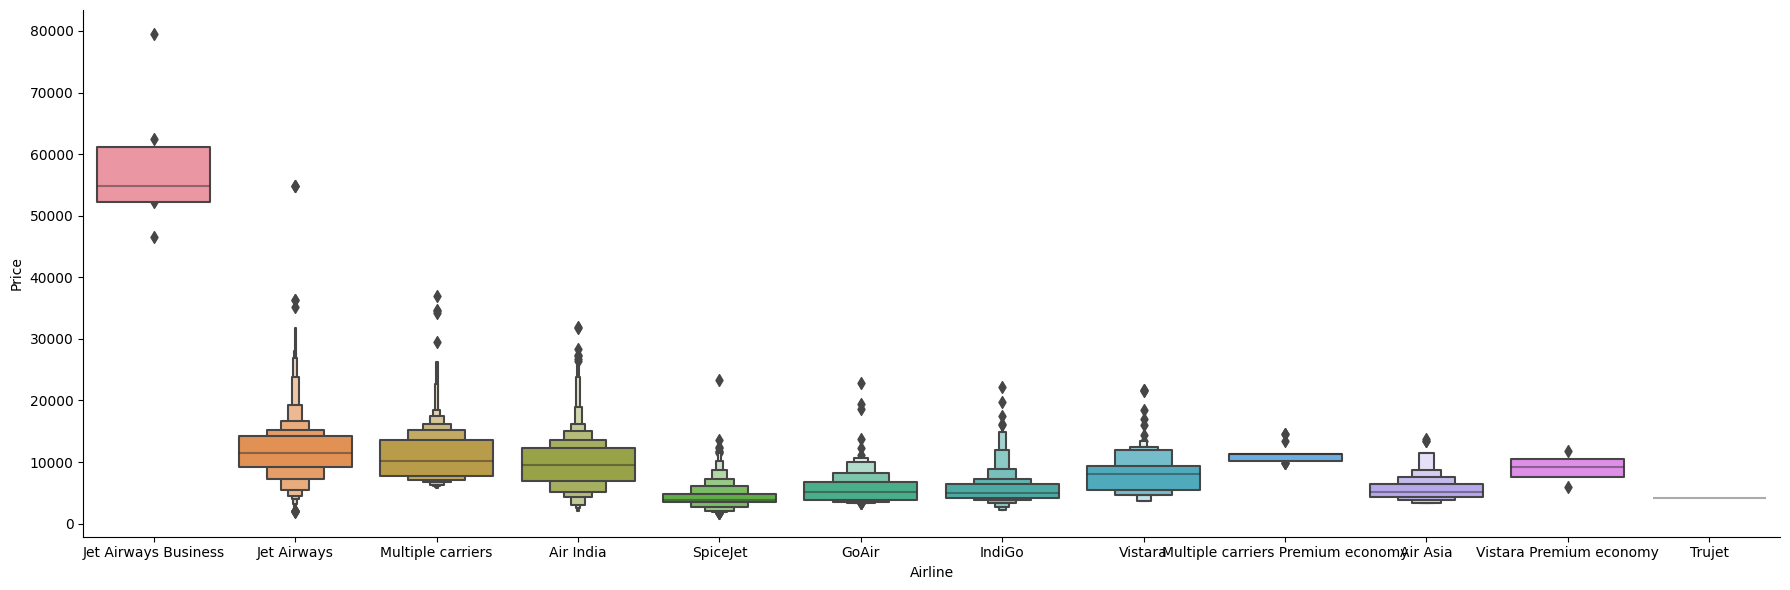

In [21]:
sns.catplot(df.sort_values('Price', ascending = False), x = 'Airline', y = 'Price', kind = 'boxen', height = 6, aspect = 3)

JetAriways Price Range is very high compared to remaining carriers

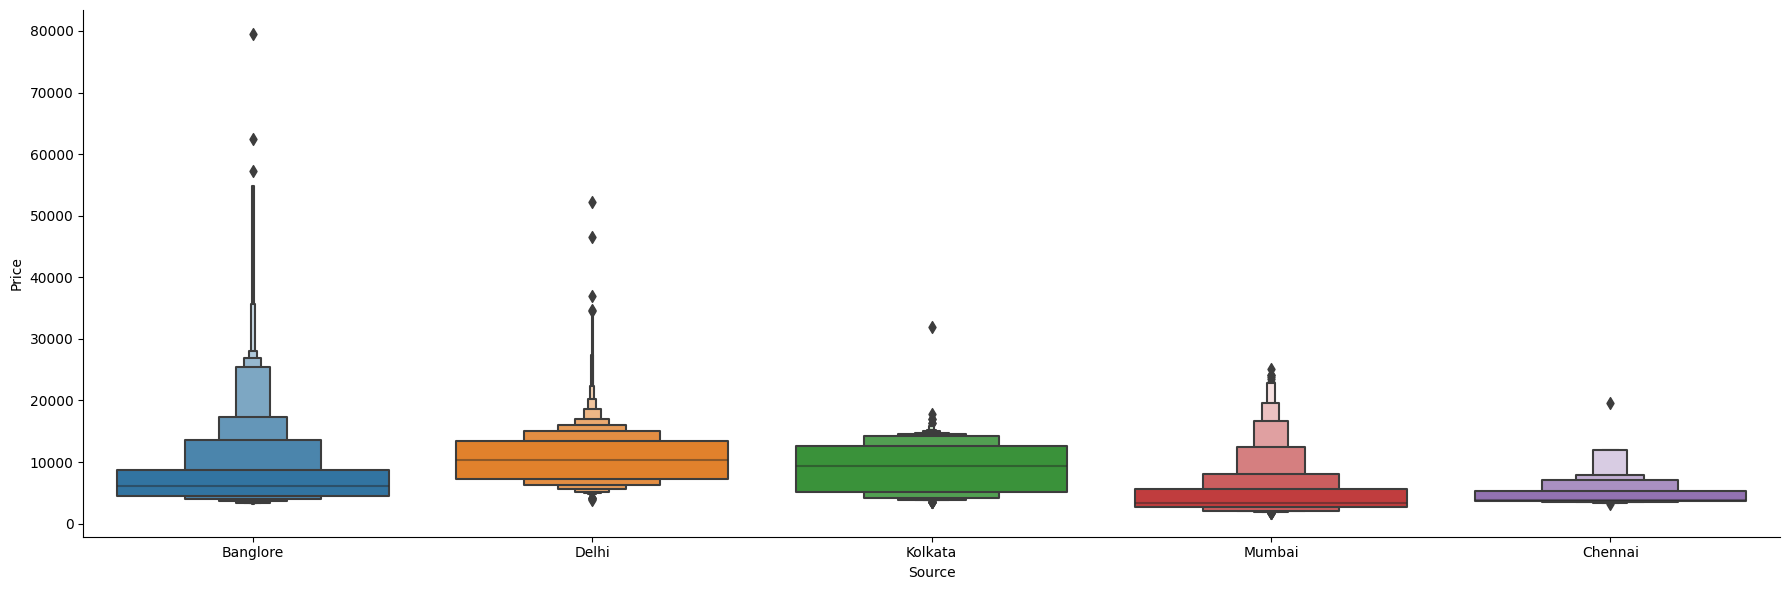

In [22]:
sns.catplot(df.sort_values('Price', ascending = False), x = 'Source', y = 'Price', kind = 'boxen', height = 6, aspect = 3)

 Looks like airlines starting from Bangalore is costlier compared to rest of the locations


<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

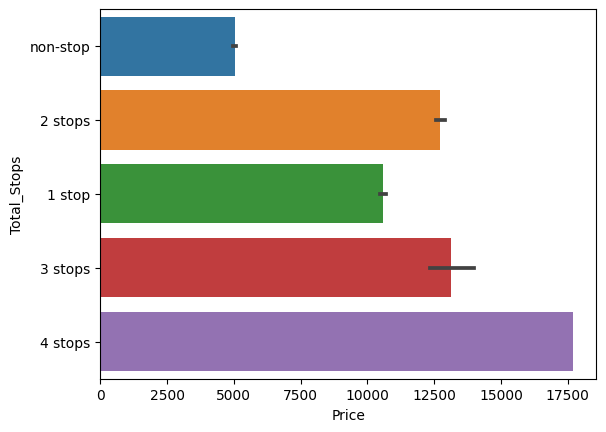

In [23]:
sns.barplot(df, x = 'Price', y = 'Total_Stops')

Flights with less stops has less fare and with more stops has high fare.

Feature Engineering
--------------------

In [24]:
# Feature correlation
np.round(df.corr(),2)

,Price,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,Duration_hours,Duration_mins
Price,1.00,-0.15,-0.10,0.01,-0.02,0.02,-0.09,0.51,-0.12
Journey_day,-0.15,1.00,-0.04,0.00,-0.01,-0.00,-0.02,-0.02,-0.01
Journey_month,-0.10,-0.04,1.00,0.04,-0.06,-0.00,-0.10,0.02,-0.04
Dep_hour,0.01,0.00,0.04,1.00,-0.02,0.01,0.07,0.00,-0.02
Dep_mins,-0.02,-0.01,-0.06,-0.02,1.00,0.04,-0.02,-0.02,0.09
Arr_hour,0.02,-0.00,-0.00,0.01,0.04,1.00,-0.15,0.06,-0.12
Arr_mins,-0.09,-0.02,-0.10,0.07,-0.02,-0.15,1.00,-0.07,0.15
Duration_hours,0.51,-0.02,0.02,0.00,-0.02,0.06,-0.07,1.00,-0.13
Duration_mins,-0.12,-0.01,-0.04,-0.02,0.09,-0.12,0.15,-0.13,1.00


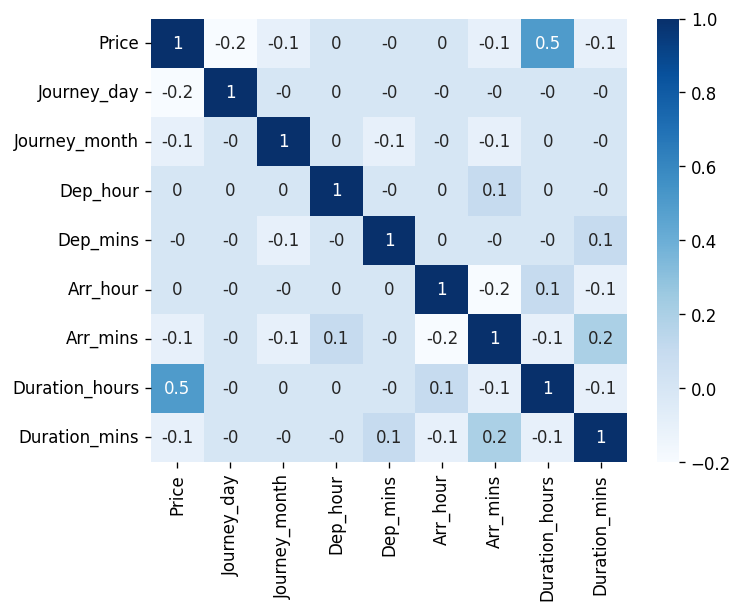

In [25]:
plt.figure(dpi=120)
sns.heatmap(np.round(df.corr(),1),annot=True, cmap="Blues")
plt.show()

Maximum correlation is for the Duration hours and the price

Handling Categorical Data

1. OneHotEncoder for nominal data
2. LabelEncoder for Ordinal data

In [26]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [28]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Creating a function to create a new comuns for stops since the old column has string attached in each row values

In [29]:
stops = list(df.Total_Stops)
for i in range(len(stops)):
    if len(stops[i].split()) != 2:
        stops[i] = 0
    else:
        stops[i] = stops[i].split()[0]

df['Stops'] = stops

In [30]:
# Removing the old stops column
df.drop(columns = ['Total_Stops'], inplace = True)

In [31]:
df.head()

,Airline,Source,Destination,Price,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,Duration_hours,Duration_mins,Stops
0,IndiGo,Banglore,New Delhi,3897,24,3,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,13302,1,3,16,50,21,35,4,45,1


In [32]:
# lets deal with categorical columns using onehotencoder and label encoder.
Airline = pd.get_dummies(df.Airline, drop_first = True)
Source = pd.get_dummies(df.Source, drop_first = True)
Destination = pd.get_dummies(df.Destination, drop_first = True)

In [33]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [34]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [35]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [36]:
# Dropping the old categorical columns after creating the dummies
df.drop(columns = ['Airline','Source', 'Destination'], inplace = True)

In [37]:
# Concatinating all the dataframes
train_data = pd.concat([df, Airline, Destination, Source], axis = 1)

In [38]:
train_data.shape

(10682, 30)

In [39]:
df.head()

,Price,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,Duration_hours,Duration_mins,Stops
0,3897,24,3,22,20,1,10,2,50,0
1,7662,1,5,5,50,13,15,7,25,2
2,13882,9,6,9,25,4,25,19,0,2
3,6218,12,5,18,5,23,30,5,25,1
4,13302,1,3,16,50,21,35,4,45,1


In [40]:
train_data.columns = ['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_mins', 'Arr_hour',
       'Arr_mins', 'Duration_hours', 'Duration_mins', 'Stops', 'Air_India',
       'GoAir', 'IndiGo', 'Jet_Airways', 'Jet_Airways_Business',
       'Multiple_carriers', 'Multiple_carriers_Premium_economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara_Premium_economy', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New_Delhi', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai']

Hypothesis Testing
--------------------
If the null hypothesis is correct, the test statistic is binomial distributed with parameters n = 350 and p = 0.5. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

In [41]:
# Hypothesis 1.0: Null: I could get 150 out of 350
from scipy.stats import binom
prob = 1 - binom.cdf(170, 350, 0.5)

print(str(round(prob*100, 1))+"%")

68.5%


The probability of getting 150 or more correct is about 68.5%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't haven mystical powers.

In [42]:
# Hypothesis 1.0: Null: I could get 180 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(180, 350, 0.5)

print(str(round(prob*100, 1))+"%")

27.8%


The probability of getting 180 or more correct is about 27.8%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't haven mystical powers.

In [43]:
# Hypothesis 1.0: Null: I could get 195 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(195, 350, 0.5)

print(str(round(prob*100, 1))+"%")

1.4%


Dataset Conclusion
-------------------

Guess the dataset is random colleciton of values and im not sure the values are near to real. But atleast we can able to perform the EDA and found interesting insights in the data.